In [ ]:
from selenium.webdriver import Chrome
import time
import sqlite3
from pandas.io import sql
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument("--start-maximized");

browser = webdriver.Chrome("chromedriver", options=options)

In [ ]:
browser.get("https://democracy.seoul.go.kr/cso/etc/search_result.jsp?collection=suggest_free&searchBar_sort=ALL&queryStr=%EB%B6%88%EB%B2%95%EC%A3%BC%EC%A0%95%EC%B0%A8&query=%EB%B6%88%EB%B2%95%EC%A3%BC%EC%A0%95%EC%B0%A8")
browser.implicitly_wait(5)

In [ ]:
#불법주정차 관련 민원데이터 수집

dfList = []
articleList = []

for i in range(1,7):
    review = browser.find_elements_by_xpath('//*[@id="suggest_free_area"]/li')

    for tmp in review:
        df = pd.DataFrame({
            "NO":[tmp.find_element_by_xpath("div").text],

        })
        dfList.append(df)

    articleList = pd.concat(dfList)

    browser.find_element_by_xpath(f'//*[@id="suggest_free_paging"]/span/a[{i}]').click()
    browser.implicitly_wait(5)

for i in range(3,9):
    review = browser.find_elements_by_xpath('//*[@id="suggest_free_area"]/li')

    for tmp in review:
        df = pd.DataFrame({
            "NO":[tmp.find_element_by_xpath("div").text],

        })
        dfList.append(df)

    articleList = pd.concat(dfList)

    browser.find_element_by_xpath(f'//*[@id="suggest_free_paging"]/span/a[{i}]').click()
    browser.implicitly_wait(5)

for i in range(3,8):
    review = browser.find_elements_by_xpath('//*[@id="suggest_free_area"]/li')

    for tmp in review:
        df = pd.DataFrame({
            "NO":[tmp.find_element_by_xpath("div").text],

        })
        dfList.append(df)

    articleList = pd.concat(dfList)

    browser.find_element_by_xpath(f'//*[@id="suggest_free_paging"]/span/a[{i}]').click()
    browser.implicitly_wait(5)

print(articleList)

In [ ]:
#데이터 처리(한글, 공백 제외)
import re

articleList["NO"] = articleList["NO"].apply(lambda x: re.sub("[^가-힣\s]","",x))
articleList

In [ ]:
#공백 row 삭제

articleList = articleList[articleList["NO"].apply(lambda x: re.sub("[^가-힣]","",x)) !=""]
articleList

In [ ]:
#단어 추출 및 빈도 수 구하기

!pip install soynlp

In [ ]:
#WordExtractor로 단어 점수 학습

from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(articleList["NO"].values)
words = word_extractor.extract()
words

In [ ]:
#Tokenizer (L-R 분리)

from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [ ]:
articleList["tokenizer"] = articleList["NO"].apply(lambda x: tokenizer.tokenize(x, remove_r=True))
articleList

In [ ]:
#각각의 단어들을 words변수에 append 작업

words = []
for i in articleList["tokenizer"].values:
    for k in i:
        words.append(k)

In [128]:
#각각의 단어들을 counter를 사용하여 빈도수를 확인

from collections import Counter
cnt = Counter(words)
words = dict(cnt)
words

{'배달대행': 10,
 '사무실': 20,
 '주정차': 230,
 '소음공해': 20,
 '사회적': 19,
 '거리두기': 15,
 '방역수칙': 10,
 '위반': 10,
 '미성년자': 15,
 '편법': 15,
 '고용': 15,
 '민원': 5,
 '제안배달대행': 5,
 '신청목적배달대행': 5,
 '사무실은': 5,
 '주택': 10,
 '밀집': 5,
 '지역까지': 5,
 '부분별한': 5,
 '개점': 5,
 '방역수칙을': 5,
 '위반하는': 5,
 '인': 13,
 '이상의': 9,
 '상시': 5,
 '집회와': 5,
 '이에': 17,
 '따른': 21,
 '이륜차': 10,
 '불법': 427,
 '일원화된': 5,
 '행정': 5,
 '사법단속을': 5,
 '통해': 5,
 '주변': 9,
 '밀집지역': 5,
 '주민의': 5,
 '피해를': 5,
 '최소화': 5,
 '할': 23,
 '수': 99,
 '관련': 25,
 '법률': 5,
 '법제화': 5,
 '단속': 173,
 '일원화': 5,
 '현황': 9,
 '문제점최근': 5,
 '코로나': 5,
 '상황으로': 5,
 '음식배달': 5,
 '서비스': 5,
 '특히': 5,
 '전방위적으': 5,
 '서울': 162,
 '사거리에': 23,
 '대각선자형횡단보도': 10,
 '설치': 106,
 '제안합니다': 23,
 '제안합니다목동고': 5,
 '봉영여중': 5,
 '계남초개': 5,
 '학교': 21,
 '총': 5,
 '여명': 5,
 '학생들의등하교시': 5,
 '교통사고': 13,
 '위험을': 5,
 '낮추기': 5,
 '위하여': 5,
 '계남초교': 5,
 '앞': 28,
 '대각선자형횡단보도를': 5,
 '신설하여': 5,
 '주시기': 5,
 '바랍니다상기': 5,
 '개': 13,
 '학교학생들': 5,
 '상당수의': 5,
 '학생들이목동로길': 5,
 '맞은편목동신시가지아파트': 5,
 '단지': 5,
 '쪽에서': 16,
 '등하교를'

In [129]:
#내림차순으로 정렬

rank = sorted(words.items(),reverse=True,key=lambda item: item[1])

In [130]:
#불법주정차 관련 빈도수 분석

for i in range(len(rank)):
    print(i+1,"위: ",rank[i])

1 위:  ('주차', 440)
2 위:  ('불법', 427)
3 위:  ('도로', 276)
4 위:  ('주정차', 230)
5 위:  ('차량', 203)
6 위:  ('단속', 173)
7 위:  ('서울', 162)
8 위:  ('불편', 142)
9 위:  ('시민', 141)
10 위:  ('전동', 111)
11 위:  ('버스', 108)
12 위:  ('설치', 106)
13 위:  ('킥보드', 104)
14 위:  ('자전거', 104)
15 위:  ('신고', 104)
16 위:  ('수', 99)
17 위:  ('횡단보도', 37)
18 위:  ('까페', 36)
19 위:  ('있습니다', 36)
20 위:  ('불편을', 35)
21 위:  ('대해', 34)
22 위:  ('앞에', 34)
23 위:  ('교통', 34)
24 위:  ('많이', 32)
25 위:  ('물건을', 32)
26 위:  ('현재', 31)
27 위:  ('저는', 30)
28 위:  ('내', 29)
29 위:  ('앞', 28)
30 위:  ('따라', 28)
31 위:  ('월', 28)
32 위:  ('년', 28)
33 위:  ('가능', 28)
34 위:  ('확보', 28)
35 위:  ('비해', 28)
36 위:  ('정도로', 27)
37 위:  ('강동구', 27)
38 위:  ('관련', 25)
39 위:  ('없는', 25)
40 위:  ('길이', 25)
41 위:  ('인한', 25)
42 위:  ('정류장', 25)
43 위:  ('대부분의', 24)
44 위:  ('보행자가', 24)
45 위:  ('합니다', 24)
46 위:  ('관련해', 24)
47 위:  ('그', 24)
48 위:  ('소화전', 24)
49 위:  ('앞까지', 24)
50 위:  ('가서', 24)
51 위:  ('버젓이', 24)
52 위:  ('작업을', 24)
53 위:  ('경우', 24)
54 위:  ('재래식', 24)
55 위:

In [ ]:
!pip install wordcloud

In [125]:
#wordcloud 시각화 진행

from wordcloud import WordCloud
wordcloud = WordCloud(height = 500, width=500,background_color="white")\
                      .generate_from_frequencies(words)

In [126]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white', width=500, height=500).generate_from_frequencies(words)


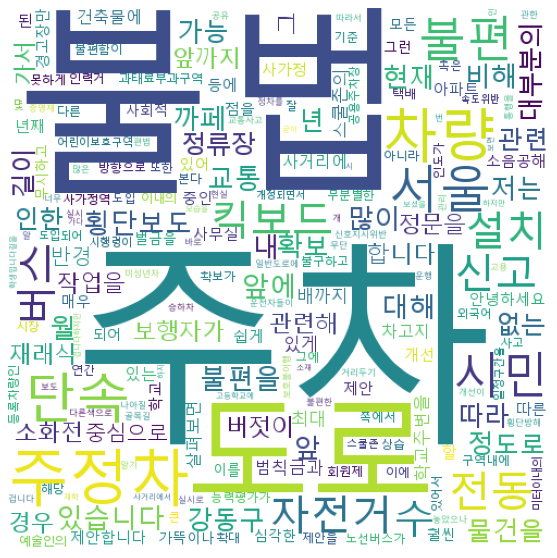

In [127]:
#wordcloud 시각화

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()